#### Import and Install Dependencies

In [1]:
#mediapipe holistic: We are able to get our face keypints
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time #To take a sleep between each frame that we collect
import mediapipe as mp

#### Keypoints using MP Holistic

In [2]:
#mediapipe holistic setup
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing Utilities

In [3]:
def mediapipe_detection(image,model):
    #Performing a Blue-Green-Red to Red-Green-Blue color conversion
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #COLOR CONVERSION
    image.flags.writeable = False #Image is no longer writable
    results = model.process(image) #Detection using media pipe - Make prediction
    image.flags.writeable = True #Image is writable
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #COLOR CONVERSION RGB 2 BGR
    return image,results

In [4]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) #Draw face connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #Draw pose connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw left-hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw right-hand connections

In [5]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [6]:
def draw_styled_landmarks(image,results):
    #Draw face connections
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))
    #Draw pose connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2))
    #Draw left-hand connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),
                            mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2)) 
    #Draw right-hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(245,117,66),thickness=2,circle_radius=4),
                            mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)) 

In [7]:
#what formatting do you wanna apply to dots
mp_drawing.draw_landmarks??

In [8]:
#Accessing our webcam using opencv and applying a second layer to make detection using pipeline

#Setting up a video capture loop through every single frame and render that on the screen
cap = cv2.VideoCapture(0) #Accessing webcam
#Set mediapipe model
#Specfying initial detection point
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened(): #Loop through all frames

        #Read feed
        ret, frame = cap.read() 

        #Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #Draw landmarks
        draw_styled_landmarks(image,results)
        
        #Show to screen
        cv2.imshow("OpenCV Feed",image)
        #Braek gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'): #wait for key to be pressed if key=='q' break
            break
    cap.release()
    cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
#Landmark values: The face and hand landmark models will return no values
#if nothing is detected. The pose model will return landmarks but the visibility value
#inside of each landmark will be low.
len(results.pose_landmarks.landmark)

33

In [10]:
#last frame captured from our webcam
frame

array([[[73, 79, 81],
        [73, 79, 81],
        [73, 79, 81],
        ...,
        [ 9, 16, 24],
        [11, 19, 27],
        [11, 19, 27]],

       [[73, 79, 81],
        [73, 79, 81],
        [73, 79, 81],
        ...,
        [ 4, 14, 22],
        [ 9, 19, 27],
        [11, 21, 29]],

       [[68, 75, 76],
        [73, 79, 81],
        [74, 81, 82],
        ...,
        [ 8, 18, 26],
        [10, 20, 28],
        [13, 22, 30]],

       ...,

       [[27, 36, 28],
        [28, 37, 29],
        [28, 37, 31],
        ...,
        [ 0,  2, 15],
        [ 7,  9, 22],
        [10, 11, 24]],

       [[25, 34, 26],
        [23, 31, 24],
        [24, 32, 26],
        ...,
        [ 0,  1, 14],
        [ 3,  4, 17],
        [ 5,  7, 20]],

       [[24, 33, 25],
        [19, 28, 20],
        [28, 37, 31],
        ...,
        [ 0,  2, 15],
        [ 1,  3, 16],
        [ 3,  4, 17]]], dtype=uint8)

In [11]:
results

mediapipe.python.solution_base.SolutionOutputs

In [12]:
draw_landmarks(frame,results)

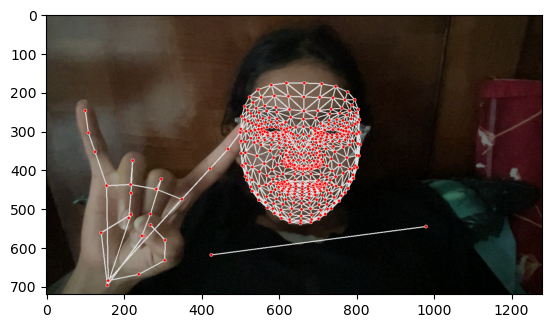

In [13]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

####
Extract Keypoint Values

In [14]:
len(results.pose_landmarks.landmark)

33

In [15]:
#Input Data: used for this action detection model is a series of 30 arrays
#each of which contains 1662 values [30,1662].
#Each of the 30 arrays represents the landmark values(1662 values) from a single frame.

#Concatinate into numpy array
pose =[] #place holder
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [16]:
test #extracted set of landmak for one of our keypoint

array([4.73855346e-01, 3.67589140e+00, 8.49906266e-01, 5.40614710e-04])

In [17]:
len(pose) #All keypoint values

33

In [18]:
#Refacted the previous code into a single line
#Flatten convert into one big array
#extracting res.x , res.y res.z that is each of the individual values for one landmark.
pose = np.array([[res.x,res.y, res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132,)
face = np.array([[res.x,res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x,res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x,res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y, res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x,res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x,res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    #concatinating all keypoints
    return np.concatenate([pose,face,lh,rh])

In [20]:
#Getting all values inside of a flat array
result_text = extract_keypoints(results)

In [21]:
np.save('0',result_text)

In [22]:
468*3+33*4+21*3+21*3

1662

In [23]:
rh

array([ 1.25088215e-01,  9.51644182e-01, -7.22460598e-08,  1.87406659e-01,
        9.30437863e-01, -3.22791338e-02,  2.39605233e-01,  8.79299223e-01,
       -5.81406020e-02,  2.40588650e-01,  8.07105064e-01, -8.48664343e-02,
        2.10700572e-01,  7.53114939e-01, -1.10211536e-01,  2.73585618e-01,
        6.61797047e-01, -3.72023024e-02,  3.30791384e-01,  5.52335262e-01,
       -6.56318069e-02,  3.66795480e-01,  4.82531726e-01, -8.11637118e-02,
        3.91772956e-01,  4.23001289e-01, -9.10833776e-02,  2.21960336e-01,
        6.25164092e-01, -4.13111635e-02,  2.32187346e-01,  5.89892030e-01,
       -9.88800526e-02,  2.10621536e-01,  7.15073943e-01, -1.19870856e-01,
        1.93633243e-01,  7.92773068e-01, -1.20837629e-01,  1.71015576e-01,
        6.08367920e-01, -4.76085767e-02,  1.74656630e-01,  5.22430182e-01,
       -9.82252210e-02,  1.71196312e-01,  6.39134645e-01, -1.00324124e-01,
        1.66477889e-01,  7.27880836e-01, -8.87471214e-02,  1.21978626e-01,
        6.13627076e-01, -

In [24]:
len(results.face_landmarks.landmark)*3

1404

In [25]:
lh.shape

(63,)

In [26]:
np.zeros(21*3).shape #If we do not get landmark values we are going to replace it with zeros

(63,)

In [27]:
lh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
rh

array([ 1.25088215e-01,  9.51644182e-01, -7.22460598e-08,  1.87406659e-01,
        9.30437863e-01, -3.22791338e-02,  2.39605233e-01,  8.79299223e-01,
       -5.81406020e-02,  2.40588650e-01,  8.07105064e-01, -8.48664343e-02,
        2.10700572e-01,  7.53114939e-01, -1.10211536e-01,  2.73585618e-01,
        6.61797047e-01, -3.72023024e-02,  3.30791384e-01,  5.52335262e-01,
       -6.56318069e-02,  3.66795480e-01,  4.82531726e-01, -8.11637118e-02,
        3.91772956e-01,  4.23001289e-01, -9.10833776e-02,  2.21960336e-01,
        6.25164092e-01, -4.13111635e-02,  2.32187346e-01,  5.89892030e-01,
       -9.88800526e-02,  2.10621536e-01,  7.15073943e-01, -1.19870856e-01,
        1.93633243e-01,  7.92773068e-01, -1.20837629e-01,  1.71015576e-01,
        6.08367920e-01, -4.76085767e-02,  1.74656630e-01,  5.22430182e-01,
       -9.82252210e-02,  1.71196312e-01,  6.39134645e-01, -1.00324124e-01,
        1.66477889e-01,  7.27880836e-01, -8.87471214e-02,  1.21978626e-01,
        6.13627076e-01, -

In [29]:
if results.left_hand_landmarks:
    num_landmarks = len(results.left_hand_landmarks.landmark)
    # Now you can safely access the landmarks
    # Your code to handle landmarks goes here
else:
    print("No hand landmarks detected.")

No hand landmarks detected.


In [30]:
pose.shape

(132,)

In [31]:
len(pose)

132

In [32]:
np.load('0.npy')

array([ 0.51413369,  0.50204688, -1.08463097, ...,  0.07946408,
        0.34540296, -0.08459747])

#### Setup Folders for Collection

In [33]:
#Path for exported data, numpy arrays
import os
DATA_PATH = os.path.join('MP_Data')

#Action Detection: A key difference between action detection and other computer vision
#tasks is that a sequence of data rather than a single frame is used for detection.
#Actions that we try to detect
actions = np.array(['hello','thanks','iloveyou'])

#Thirty videos worth of data
no_sequences=30

#Videos are going to be 30 frames in length
sequence_length=30

In [34]:
#Create one photo for each action
#hello
## 0 #for sequence 0 we would have 30 different keypoints worth of data
## 1
## 2
## ...
## 29
#thanks

#I love you


In [35]:
#3 actions(hello, thankyou, iloveyou) - 30 videos per action - 30 frames per video
for action in actions:
    for sequence in range(no_sequences):
        try:
            #Make the sub directories
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

#### Collect Keypoint Calues for Training and Testing

In [36]:
#Accessing our webcam using opencv and applying a second layer to make detection using pipeline

#Setting up a video capture loop through every single frame and render that on the screen
cap = cv2.VideoCapture(0) #Accessing webcam
#Set mediapipe model
#Specfying initial detection point
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    #Loop through actions
    for action in actions:
        #Loop through sequences aka videos
        for sequence in range(no_sequences):
            #Loop through video length aka sequence length (each frame)
            # 30 frames of keypoints per video
            for frame_num in range(sequence_length):
                
                #Read feed
                ret, frame = cap.read() 

                #Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                #Draw landmarks
                draw_styled_landmarks(image,results)
                
                # Apply wait logic
                if frame_num == 0:
                    #outputting text to our screen
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frame for {} video number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frame for {} video number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                     #Show to screen
                    cv2.imshow('OpenCV Feed',image)

                
                #New export keypoints
                keypoints = extract_keypoints(results)
                #where we are going to save our frame
                npy_path = os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                
               
                #Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'): #wait for key to be pressed if key=='q' break
                    break
    cap.release()
    cv2.destroyAllWindows()
    
    #Shorten breaks: In order to shorten the breaks between sequences collected change the value in
    #cv2.waitTime() to a lower value. To increase the time increase the value.
    
    #Collection Breaks : Having breaks between each sequence collection allows
    #you to rest and reposition yourself to collect the action from start to finish.

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [37]:
    cap.release()
    cv2.destroyAllWindows()

#### Preprocess Data and Create Labels and Features

In [38]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical #convert data into one-hot encoded data

In [39]:
#Create label dictionary to represent each one of our different actions
label_map = {label:num for num, label in enumerate(actions)} #looping through each actions

In [40]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [41]:
#Structure all the keypoint data
sequences, labels = [],[]
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = [] #represent all different frames that we got for that artcular sequence
        for frame_num in range(sequence_length):
            #passing hrough full path of different numpy arrays
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            #going through each one of 30 frames and appending that to window
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [42]:
np.array(sequences).shape #90 videos of 30 frames each. Ecah frames have 1662 diff keypoints

(90, 30, 1662)

In [43]:
np.array(labels).shape

(90,)

In [44]:
#Store sequences into a numpy array
X = np.array(sequences)

In [45]:
X.shape

(90, 30, 1662)

In [46]:
y = to_categorical(labels).astype(int)

In [47]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [48]:
#Perform a training and testing partition
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.05)

In [49]:
X_train.shape

(85, 30, 1662)

In [50]:
X_test.shape

(5, 30, 1662)

In [51]:
y_train.shape

(85, 3)

In [52]:
y_test.shape

(5, 3)

#### Build and train LSTM Neural Network

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [54]:
#Create a log directory and setup our tensorflow callback
log_dir = os.path.join('Logs')
#Tensorboard allows us to monitor our neural network train
tb_callback = TensorBoard(log_dir=log_dir)

In [89]:
model = Sequential() #Instantiating the model
#64 LSTM units
#return_sequences : return the sequences to the next layer
model.add(LSTM(64,return_sequences=True,activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True,activation='relu'))
#we need not to return the sequences to the next layer because it's a Dense layer
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [90]:
actions.shape[0]

3

In [91]:
res = [.7,0,.2,.1]

In [92]:
actions[np.argmax(res)]

'hello'

In [93]:
#for a multi-class classifictaion model we use categorical_crossentropy as the loss function
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [94]:
model.fit(X_train,y_train,epochs=200,callbacks=[tb_callback])

Epoch 1/200
3/3 [==============================] - 3s 43ms/step - loss: 5.9679 - categorical_accuracy: 0.3176
Epoch 2/200
3/3 [==============================] - 0s 43ms/step - loss: 2.3751 - categorical_accuracy: 0.4118
Epoch 3/200
3/3 [==============================] - 0s 43ms/step - loss: 8.1433 - categorical_accuracy: 0.3882
Epoch 4/200
3/3 [==============================] - 0s 45ms/step - loss: 6.3257 - categorical_accuracy: 0.3176
Epoch 5/200
3/3 [==============================] - 0s 44ms/step - loss: 4.6767 - categorical_accuracy: 0.3412
Epoch 6/200
3/3 [==============================] - 0s 41ms/step - loss: 10.1755 - categorical_accuracy: 0.3294
Epoch 7/200
3/3 [==============================] - 0s 42ms/step - loss: 12.3217 - categorical_accuracy: 0.2824
Epoch 8/200
3/3 [==============================] - 0s 48ms/step - loss: 5.7025 - categorical_accuracy: 0.2353
Epoch 9/200
3/3 [==============================] - 0s 48ms/step - loss: 4.2903 - categorical_accuracy: 0.3294
Epoch 10

3/3 [==============================] - 0s 51ms/step - loss: 0.4482 - categorical_accuracy: 0.8118
Epoch 75/200
3/3 [==============================] - 0s 53ms/step - loss: 0.5284 - categorical_accuracy: 0.8235
Epoch 76/200
3/3 [==============================] - 0s 56ms/step - loss: 0.3814 - categorical_accuracy: 0.8588
Epoch 77/200
3/3 [==============================] - 0s 54ms/step - loss: 0.4064 - categorical_accuracy: 0.8353
Epoch 78/200
3/3 [==============================] - 0s 54ms/step - loss: 0.4920 - categorical_accuracy: 0.7882
Epoch 79/200
3/3 [==============================] - 0s 53ms/step - loss: 0.3847 - categorical_accuracy: 0.8588
Epoch 80/200
3/3 [==============================] - 0s 52ms/step - loss: 0.3735 - categorical_accuracy: 0.8706
Epoch 81/200
3/3 [==============================] - 0s 56ms/step - loss: 0.3168 - categorical_accuracy: 0.8824
Epoch 82/200
3/3 [==============================] - 0s 54ms/step - loss: 0.2794 - categorical_accuracy: 0.9059
Epoch 83/200
3

3/3 [==============================] - 0s 57ms/step - loss: 0.3465 - categorical_accuracy: 0.8824
Epoch 148/200
3/3 [==============================] - 0s 53ms/step - loss: 0.3643 - categorical_accuracy: 0.8588
Epoch 149/200
3/3 [==============================] - 0s 53ms/step - loss: 0.4573 - categorical_accuracy: 0.8353
Epoch 150/200
3/3 [==============================] - 0s 53ms/step - loss: 0.5946 - categorical_accuracy: 0.7294
Epoch 151/200
3/3 [==============================] - 0s 54ms/step - loss: 0.4831 - categorical_accuracy: 0.7765
Epoch 152/200
3/3 [==============================] - 0s 56ms/step - loss: 0.3878 - categorical_accuracy: 0.8588
Epoch 153/200
3/3 [==============================] - 0s 54ms/step - loss: 0.2518 - categorical_accuracy: 0.9059
Epoch 154/200
3/3 [==============================] - 0s 55ms/step - loss: 0.2595 - categorical_accuracy: 0.9176
Epoch 155/200
3/3 [==============================] - 0s 52ms/step - loss: 0.2414 - categorical_accuracy: 0.9176
Epoch 

In [95]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

#### Make Predictions

In [96]:
res = model.predict(X_test)

1/1 [==============================] - 0s 325ms/step


In [97]:
np.argmax(0)

0

In [98]:
np.sum(res[0])

1.0

In [99]:
actions[np.argmax(res[0])]

'iloveyou'

In [100]:
actions[np.argmax(y_test[0])]

'hello'

#### Save Weights

In [101]:
model.save('action.h5')

In [ ]:
# #Reload our model after deleting
# del model
# model.load_weights['action.h5']

#### Evaluation using Confusion Matrix and Accuracy

In [102]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [103]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [104]:
#Converts the predictions from their one-hot encoded representation to a categorical label eg 0,1 or 2 as opposed to [1,0,0] ,[0,1,0] or [0,0,1]
ytrue = np.argmax(y_test,axis=1).tolist()
yhat = np.argmax(yhat,axis=1).tolist()

In [105]:
yhat

[2, 2, 1, 1, 2]

In [106]:
ytrue

[0, 0, 2, 1, 2]

In [107]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[3, 0],
        [2, 0]],

       [[3, 1],
        [0, 1]],

       [[1, 2],
        [1, 1]]])

In [108]:
#the mcm function returns a confusion matrix sorted by the label order, in this case 0,1,2 aka hello, thanks, ily
#The matrix is organized as follows :
#[TRUE N,FALSE P]
#[FALSE N,TRUE P]
multilabel_confusion_matrix??

In [109]:
accuracy_score(ytrue,yhat)

0.4

#### Test in Real Time

In [110]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


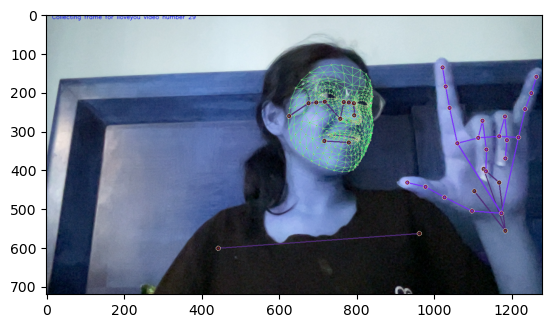

In [111]:
plt.imshow(image)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(prob_viz(res,actions,image,colors))

#### Test in Real Time

In [114]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
thanks
<class 'media

1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ilov

1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
thanks
<class 'media

1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ilov

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.Solution

1/1 [==============================] - 0s 17ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
ilov

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
iloveyou


In [115]:
X_test[0].shape #shpae that model is expecting (1,30,1662)

(30, 1662)

In [116]:
np.expand_dims(X_test[0],axis=0).shape

(1, 30, 1662)

In [117]:
model.predict(np.expand_dims(X_test[0],axis=0))

1/1 [==============================] - 0s 17ms/step


array([[0.32762104, 0.10437869, 0.56800026]], dtype=float32)

In [118]:
res[np.argmax(res)] > threshold

False

In [119]:
sequence.append('abc')
sequence

[array([ 0.54750103,  0.34119704, -0.8647784 , ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54762471,  0.3411985 , -0.86573899, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54667467,  0.34080613, -0.87012947, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54563582,  0.3403843 , -0.8246606 , ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54555178,  0.34019801, -0.89777994, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54549086,  0.33952796, -0.87530339, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54483807,  0.33937553, -0.86973888, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54400814,  0.33916137, -0.89189798, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54349142,  0.33904812, -0.86990106, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.54349601,  0.33906418, -0.86791945, ...,  0.        ,
         0.        ,  0.  